In [43]:
%matplotlib inline
import pandas as pd

In [44]:
# Cargamos data set creado en csv compras_df_enriced.csv
compras_df = pd.read_csv('data/compras_df_enriched.csv')

# Probar un Modelo Supervisado

### Convertir datos categóricos a numéricos

In [45]:
compras_df.head(2)

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET,DIA,MES,AÑO,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO,HAS_LINKEDIN_SITE
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.8,GASTOS VARIOS,11,12,2020,13,881659.731797,True
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.8,GASTOS VARIOS,11,12,2020,13,881659.731797,True


In [46]:
# por cada columna o variable que tenemos realizamos un acción
# convertimos variables a numéricas
data = compras_df.copy()
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode()) #en caso de var categ
        data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes #convertimos esta column en categór
    else:    
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median()) #en caso que no sea var categ

In [47]:
data.head()

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET,DIA,MES,AÑO,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO,HAS_LINKEDIN_SITE
0,110152,161,167,1388,130,780,1,1019110.0,8,14911.80,2,11,12,2020,13,881659.731797,True
1,110152,161,167,1389,135,845,1,1019110.0,8,2528.80,2,11,12,2020,13,881659.731797,True
2,110152,161,167,1390,132,759,1,1019110.0,8,8500.02,2,11,12,2020,13,881659.731797,True
3,110152,161,167,1391,131,757,1,1019110.0,8,2400.01,2,11,12,2020,13,881659.731797,True
4,110152,161,167,1392,417,859,1,299001496.0,16,1537.00,2,23,12,2020,13,881659.731797,True


In [48]:
# importamos librerias de modelo para machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [49]:
# Separamos la variable de interés y =  'IMPORTE' y las var features x
y = data.pop('IMPORTE')
X = data.copy()

In [50]:
# separamsos variables de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
# configuramos clasificador
clf = RandomForestRegressor(n_estimators=1000, max_depth=4)

In [52]:
# definioms modeloy entrenamos
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [53]:
from sklearn.metrics import r2_score #importamos para medir predición del modelo

In [54]:
# medir precision de nuestro modelo
r2_score(y_test, clf.predict(X_test))

0.18515940958962096

# Probrar un modelo no supervisado o de clustering par texto

In [55]:
import gensim
from nltk.corpus import stopwords
import numpy as np
np.random.seed(2021)

In [56]:
# función creación tokens (tokenización), para trabajar con palabras separadas
def preprocess(text):
    result = []
    for token in text.split():
        if token not in stopwords.words('spanish') and len(token)>4:
            result.append(token)
        return result

In [57]:
# procesamos los negocios
process_business = [preprocess(x) for x in list(compras_df['BENEFICIARIO'].unique())]

In [58]:
# procesamos los dos insumos pra clusterear, el diccionario y el corpus
dictionary = gensim.corpora.Dictionary(process_business)

In [59]:
dictionary.filter_extremes(no_below=1, no_above=0.5)

In [60]:
bow_corpus = [dictionary.doc2bow(doc) for doc in process_business]

In [61]:
# Construimos el modelo
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=6, id2word=dictionary, passes=10, workers=2)

In [62]:
# Observaciones por cada uno de los clusters
for idx, type_business in lda_model.print_topics(-1):
    print('Topc:{} Words:{}'.format(idx, type_business))

Topc:0 Words:0.068*"RODRIGUEZ" + 0.055*"INSTITUTO" + 0.042*"BANCO" + 0.029*"CANTU" + 0.029*"UNIVERSIDAD" + 0.029*"HERNANDEZ" + 0.029*"SERVICIO" + 0.029*"GRUPO" + 0.028*"RAMOS" + 0.015*"ESPINOSA"
Topc:1 Words:0.085*"GARCIA" + 0.044*"PEREZ" + 0.030*"LOZANO" + 0.030*"VARGAS" + 0.030*"MORENO" + 0.030*"INTEGRACION" + 0.030*"INMOBILIARIA" + 0.016*"MELCHOR" + 0.016*"LOGOMUNDO," + 0.016*"MADERA"
Topc:2 Words:0.123*"CONSTRUCTORA" + 0.056*"SEGUROS" + 0.042*"TREVIÑO" + 0.029*"GUERRERO" + 0.016*"PRAXAIR" + 0.016*"F/4086906" + 0.016*"CORONEL" + 0.016*"AYALA" + 0.016*"CERVEZAS" + 0.016*"VERGARA"
Topc:3 Words:0.068*"CONSTRUCCIONES" + 0.055*"DESARROLLOS" + 0.042*"VILLARREAL" + 0.015*"BENITES" + 0.015*"TIJERINA" + 0.015*"INDUSTRIAS" + 0.015*"HOSP.UNIVERSITARIO" + 0.015*"FIDEICOMISO" + 0.015*"VALLEJO" + 0.015*"EDIFICIOS"
Topc:4 Words:0.031*"CENTRO" + 0.031*"DESARROLLO" + 0.017*"TRACTORES" + 0.017*"FORTERRA," + 0.017*"MAYORGA" + 0.017*"FLORES" + 0.017*"PADILLA" + 0.017*"CORPUS" + 0.017*"IIRSACERO," + 0.0

In [63]:
# creamos función para que asigne a cada nombre su cluster
def get_max_topic(index):
    results = lda_model[bow_corpus[index]]
    return max(lda_model[results], key=lambda x: x[1])[0]

In [64]:
business_cluster = {x: get_max_topic(i) for i, x in enumerate(list(compras_df['BENEFICIARIO'].unique()))}

In [65]:
business_cluster

{'LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.': 2,
 'GH MAQUINARIA Y EQUIPO, S.A.DE C.V.': 2,
 'PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.': 3,
 'EQUIPOS Y ACCESORIOS CANTU, S.A. DE C.V.': 2,
 'PRAXAIR MEXICO S. DE R.L. DE C.V.': 2,
 'COMERCIALIZADORA HNOS.ALVAREZ FLORES,S.A.DE C.V.': 2,
 'DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALIZA,S.A.DE C.V.': 2,
 'NUÑEZ LOPEZ VIRGINIA': 2,
 'S.I.M.E.P.R.O.D.E.': 2,
 'TRACTORES Y MAQUINARIA REAL, S.A. DE C.V.': 5,
 'TELEFONOS DE MEXICO,S.A.B DE C.V.': 2,
 'MERCANTIL DISTRIBUIDORA, S.A. DE C.V.': 2,
 'GRANA,S.A.': 3,
 'CLUB INTERNACIONAL DE MONTERREY,A.C.': 2,
 'EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S.A.DE C.V.': 3,
 'VIVERO EL ESCORIAL, S.A. DE C.V.': 0,
 'CAR ONE AMERICANA,S.A.DE C.V.': 2,
 'MANTENIMIENTO ELECTRICO DE POTENCIA,S.A.DE C.V.': 0,
 'AUTOKAM REGIOMONTANA,S.A.DE C.V.': 3,
 'CLIMEEZ DEL NORTE,S.A.DE C.V.': 2,
 'VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.': 5,
 'SEGUROS AFIRME, S.A. DE C.V. AFIRME GRUPO FINANCIERO': 2

In [66]:
compras_df['CLUSTER_NAME'] = compras_df['BENEFICIARIO'].apply(lambda x: business_cluster[x])

In [67]:
compras_df['CLUSTER_NAME']

0       2
1       2
2       2
3       2
4       2
       ..
1535    5
1536    5
1537    2
1538    3
1539    2
Name: CLUSTER_NAME, Length: 1540, dtype: int64

In [68]:
compras_df['CLUSTER_NAME'].value_counts()

CLUSTER_NAME
2    984
3    272
0    161
5    123
Name: count, dtype: int64

<Axes: xlabel='CLUSTER_NAME'>

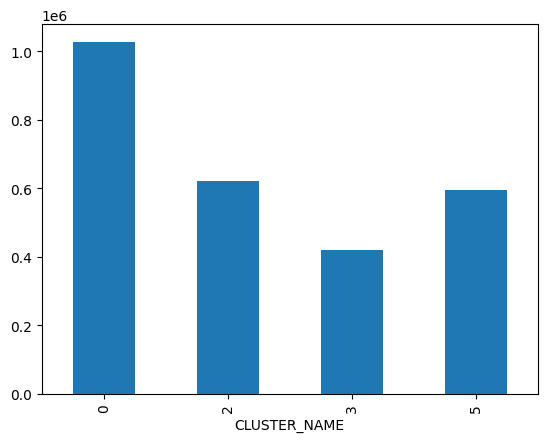

In [69]:
compras_df.groupby('CLUSTER_NAME')['IMPORTE'].mean().plot.bar()

# Probar un modelo no Supervisado de anomalías en cuanto a importes